In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 16 14:01:30 2017

@author: mglez
"""

import scipy
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import lmfit

#------------------------------------------------------

"""
Test with fake values to test the fitting method. These simple test serve
to progressively get to a more complex model with basic ensurance of the
fitting method's performance.

Our fitting method -Levenberg-Marquardt- works best for linear functions
so we transform the data to perform the fit and then take the inverse
transformation to give the results.
"""

"\nTest with fake values to test the fitting method. These simple test serve\nto progressively get to a more complex model with basic ensurance of the\nfitting method's performance.\n\nOur fitting method -Levenberg-Marquardt- works best for linear functions\nso we transform the data to perform the fit and then take the inverse\ntransformation to give the results.\n"

-------------------------------------- 
 TEST 1 
-------------------------------------- 
[[Model]]
    Model(test1)
[[Fit Statistics]]
    # function evals   = 13
    # data points      = 50
    # variables        = 1
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -3596.006
    Bayesian info crit = -3594.094
[[Variables]]
    alpha:   2.50000000 +/- 2.53e-17 (0.00%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)



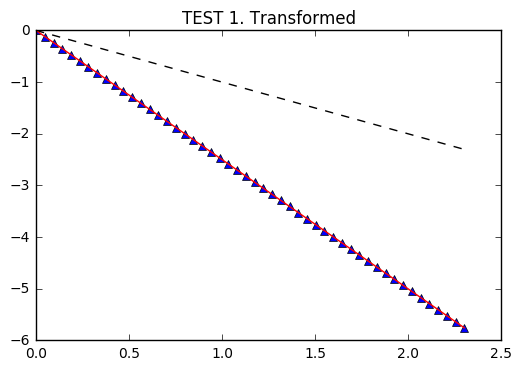

Spectral index alpha =  2.5
Electron index p =  4.0


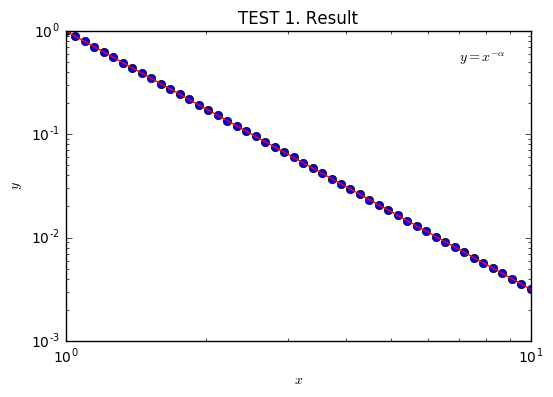

In [12]:
#-------------TEST 1---------------------
"""
First test - the simplest function.

y=x**(-alpha)
"""
print('-------------------------------------- \n TEST 1 \n-------------------------------------- ')
# X data
px = np.linspace(np.log(1),np.log(10),50)  # Fake primal-data
x = np.e**(px)  # X values - simulation for real frequency measurements 
x1 = np.log(x)  # Transformation of real data
 
# Y data
# Y  values - simulation for real flux density measurements
y = (x)**(-2.5)
y1 = np.log(y)  #Transformation or real y

# Origin function to be fitted - transformed simulated physical behaviour
def test1(x, alpha):
    return (-alpha)*x

# Theoretical model
modelTest1 = lmfit.Model(test1)
# Hints for model parameters
modelTest1.set_param_hint('alpha',value=1,min=0.5,max=5)

#Fitting
resultTest1 = modelTest1.fit(y1, x=x1)
print(resultTest1.fit_report())
plt.plot(x1, y1, 'b^')
plt.plot(x1, resultTest1.init_fit, 'k--')
plt.plot(x1, resultTest1.best_fit, 'r-')
plt.title('TEST 1. Transformed')
plt.show()

# Results
test1_values = resultTest1.best_values
alpha_1 = test1_values['alpha']
p_1 = 2*(alpha_1)-1

print('Spectral index alpha = ', alpha_1)
print('Electron index p = ', p_1)


#Final Result
ffit = x**(-alpha_1)
plt.loglog(x, y, 'bo')
plt.loglog(x, ffit, 'r-')
plt.title('TEST 1. Result')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.text(7,0.5,r'$y = x^{-\alpha}$')
plt.show()


-------------------------------------- 
 TEST  2
-------------------------------------- 
[[Model]]
    Model(test2)
[[Fit Statistics]]
    # function evals   = 11
    # data points      = 50
    # variables        = 1
    chi-square         = 0.601
    reduced chi-square = 0.012
    Akaike info crit   = -219.079
    Bayesian info crit = -217.167
[[Variables]]
    alpha:   2.50608718 +/- 0.011719 (0.47%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)



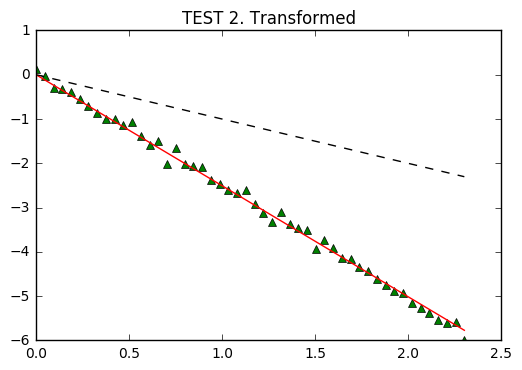

Spectral index alpha =  2.5060871857
Electron index p =  4.01217437139


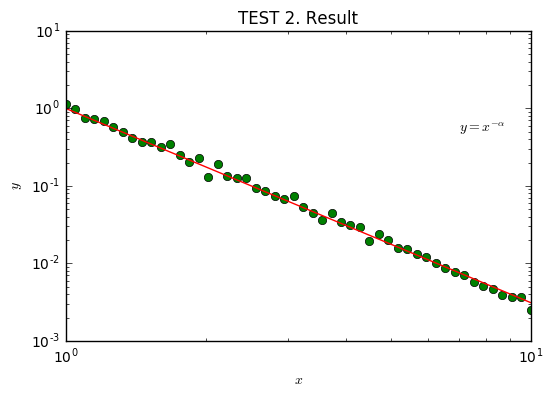

In [4]:
#-------------TEST 2---------------------
"""
Second test - the simplest function with random error.

y=x**(-alpha)
"""
print('-------------------------------------- \n TEST  2\n-------------------------------------- ')
# X data
px = np.linspace(np.log(1),np.log(10),50)  # Fake primal-data
x = np.e**(px)  # X values - simulation for real frequency measurements 
x1 = np.log(x)  # Transformation of real data
 
# Y data
# Y  values - simulation for real flux density measurements
y = (x)**(-2.5)*(1+np.random.normal(size=len(px),scale=0.1))
y1 = np.log(y)  #Transformation or real y

# Origin function to be fitted - transformed simulated physical behaviour
def test2(x, alpha):
    return (-alpha)*x

# Theoretical model
modelTest2 = lmfit.Model(test2)
# Hints for model parameters
modelTest2.set_param_hint('alpha',value=1,min=0.5,max=5)

#Fitting
resultTest2 = modelTest2.fit(y1, x=x1)
print(resultTest2.fit_report())
plt.plot(x1, y1, 'g^')
plt.plot(x1, resultTest2.init_fit, 'k--')
plt.plot(x1, resultTest2.best_fit, 'r-')
plt.title('TEST 2. Transformed')
plt.show()

# Results
test2_values = resultTest2.best_values
alpha_2 = test2_values['alpha']
p_2 = 2*(alpha_2)-1

print('Spectral index alpha = ', alpha_2)
print('Electron index p = ', p_2)


#Final Result
ffit = x**(-alpha_2)
plt.loglog(x, y, 'go')
plt.loglog(x, ffit, 'r-')
plt.title('TEST 2. Result')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.text(7,0.5,r'$y = x^{-\alpha}$')
plt.show()


-------------------------------------- 
 TEST  3
-------------------------------------- 
[[Model]]
    Model(test3)
[[Fit Statistics]]
    # function evals   = 18
    # data points      = 50
    # variables        = 2
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -3469.782
    Bayesian info crit = -3465.958
[[Variables]]
    alpha:   2.50000000 +/- 1.74e-16 (0.00%) (init= 1)
    C:       4.90527477 +/- 2.33e-16 (0.00%) (init= 4.905275)
[[Correlations]] (unreported correlations are <  0.100)
    C(alpha, C)                  =  0.862 



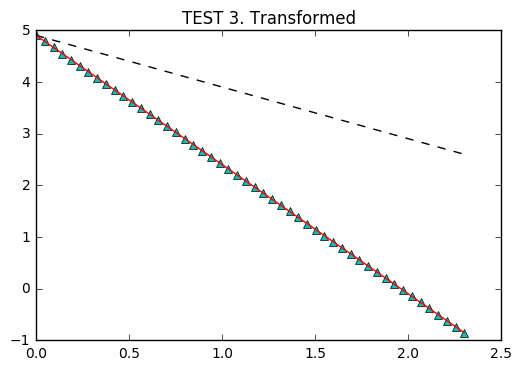

Spectral index alpha =  2.5
Electron index p =  4.0
Constant C =  135.0


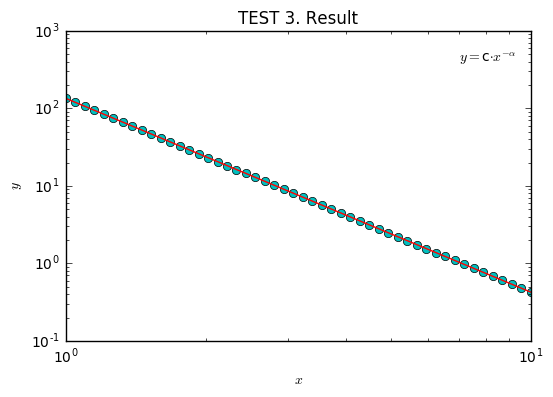

In [5]:
#-------------TEST 3---------------------
"""
Third test - simulated function for statioanry electron distribution.

y=C*x**(-alpha)
"""
print('-------------------------------------- \n TEST  3\n-------------------------------------- ')
# X data
px = np.linspace(np.log(1),np.log(10),50)  # Fake primal-data
x = np.e**(px)  # X values - simulation for real frequency measurements 
x1 = np.log(x)  # Transformation of real data
 
# Y data
# Y  values - simulation for real flux density measurements
y = 135*(x)**(-2.5)
y1 = np.log(y)  #Transformation or real y

# Origin function to be fitted - transformed simulated physical behaviour
def test3(x, alpha, C):
    return (-alpha)*x+C

# Theoretical model
modelTest3 = lmfit.Model(test3)
# Hints for model parameters
modelTest3.set_param_hint('alpha',value=1,min=0.5,max=5)
modelTest3.set_param_hint('C',value=np.log(135),min=np.log(50),max=np.log(250))
#Fitting
resultTest3 = modelTest3.fit(y1, x=x1)
print(resultTest3.fit_report())
plt.plot(x1, y1, 'c^')
plt.plot(x1, resultTest3.init_fit, 'k--')
plt.plot(x1, resultTest3.best_fit, 'r-')
plt.title('TEST 3. Transformed')
plt.show()

# Results
test3_values = resultTest3.best_values
alpha_3 = test3_values['alpha']
p_3 = 2*(alpha_3)-1
C_3 = test3_values['C']
C_3 = np.e**(C_3)

print('Spectral index alpha = ', alpha_3)
print('Electron index p = ', p_3)
print('Constant C = ',C_3)


#Final Result
ffit = C_3*x**(-alpha_3)
plt.loglog(x, y, 'co')
plt.loglog(x, ffit, 'r-')
plt.title('TEST 3. Result')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.text(7,400,r'$y = $c$ · x^{-\alpha}$')
plt.show()



-------------------------------------- 
 TEST 4 
-------------------------------------- 
[[Model]]
    Model(test4)
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 50
    # variables        = 2
    chi-square         = 0.621
    reduced chi-square = 0.013
    Akaike info crit   = -215.449
    Bayesian info crit = -211.625
[[Variables]]
    alpha:   2.51340481 +/- 0.023714 (0.94%) (init= 1)
    C:       4.89825336 +/- 0.031686 (0.65%) (init= 4.615121)
[[Correlations]] (unreported correlations are <  0.100)
    C(alpha, C)                  =  0.862 



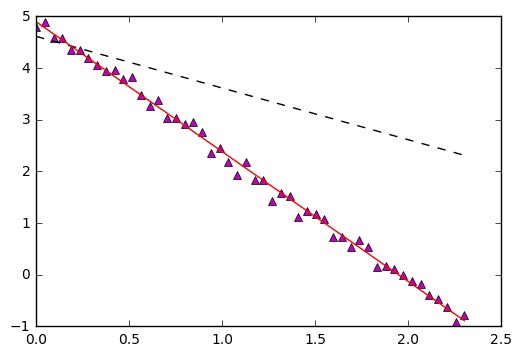

Spectral index alpha =  2.51340481531
Electron index p =  4.02680963062
Constant C =  134.055429622


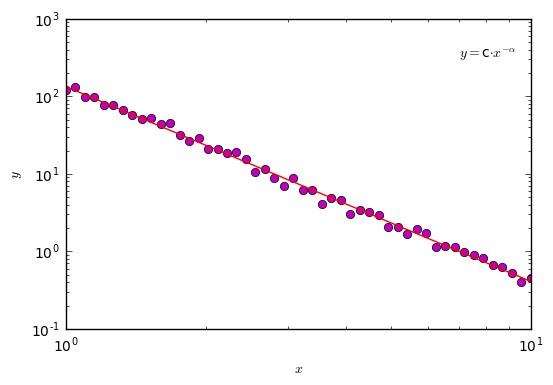

In [8]:
#-------------TEST 4---------------------
"""
Fourth test - simulated function for statioanry electron distribution + error.

y=C*x**(-alpha)
"""
print('-------------------------------------- \n TEST 4 \n-------------------------------------- ')
# X data
px = np.linspace(np.log(1),np.log(10),50)
x = np.e**(px)
x1 = np.log(x)
 
# Y data + error
y = 135*(x)**(-2.5)*(1+np.random.normal(size=len(x), scale=0.1))
y1 = np.log(y)


# Origin function
def test4(x, alpha, C):
    return (-alpha)*x+C

# Model
modelTest4 = lmfit.Model(test4)
modelTest4.set_param_hint('alpha',value=1,min=0.5,max=5)
modelTest4.set_param_hint('C',value=np.log(101),min=np.log(100),max=np.log(200))
#Fitting
resultTest4 = modelTest4.fit(y1, x=x1)
print(resultTest4.fit_report())
plt.plot(x1, y1, 'm^')
plt.plot(x1, resultTest4.init_fit, 'k--')
plt.plot(x1, resultTest4.best_fit, 'r-')
plt.show()

# Results
test4_values = resultTest4.best_values
alpha_4 = test4_values['alpha']
p_4 = 2*alpha_4-1
C_4 = test4_values['C']
C_4= np.e**(C_4)

print('Spectral index alpha = ', alpha_4)
print('Electron index p = ', p_4)
print('Constant C = ',C_4)

#Final Result
ffit = C_4*x**(-alpha_4)
plt.loglog(x, y, 'mo')
plt.loglog(x, ffit, 'r-')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.text(7,320,r'$y = $c$ · x^{-\alpha}$')
plt.show()